In [1]:
%matplotlib inline
import matplotlib
import collections as col
import numpy as np
import matplotlib.pylab as plt
import ghostpy.Invariants.LShell as ls
import ghostpy.algorithms.convert as algx
import ghostpy.algorithms.common as algc
import ghostpy.algorithms.FieldTracers as ft
import ghostpy.algorithms.DipoleField as df
import ghostpy.data.VtkData as vdt
import ghostpy.data.LfmVtkData as lvdt
import ghostpy.data.DipoleData as dpd
import ghostpy.data.GpData as gpd
import ghostpy.plotting.FieldLinePlot as flplt
import ghostpy.Invariants.FieldLine as fl
from matplotlib.ticker import FormatStrFormatter
import pickle
import csv

T96 Not Found
Failure getting T96


In [2]:
data = dpd.DipoleData()
datal = vdt.VtkData(filename="../unit_tests/test_data/WHIQuad.vts", vector="B")

In [3]:
fl1 = fl.FieldLine(data=data, start=[8.0,0,0])
fl2 = fl.FieldLine(data=datal, start=[8.0, 0, 0], smooth=0)

/Users/jomu9721/src/GHOST/ghostpy/ghostpy/algorithms/FieldTracers.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  s = 0.84 * (error_tol * h / (algc.mag(x2 - x1))) ** 0.25
/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/jomu9721/src/GHOST/ghostpy/ghostpy/Invariants/FieldLine.py:786: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(int_list[0] - int_list) * dtrace
/usr/local/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


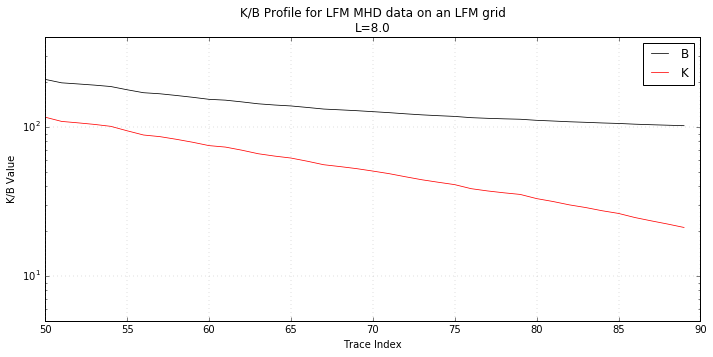

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_yscale('log')

y = fl2.m_trace_b_mirror
# x = fl1.m_trace_re
x = np.arange(len(y))
k = fl2.K

y = np.array(y)[50:90]
x = np.array(x)[50:90]
k = np.array(k)[50:90]

ax.plot(x,y, 'k-', lw=0.75, label="B")
ax.plot(x,k, 'r-', lw=0.75, label='K')

ax.set_ylabel("K/B Value")
ax.set_xlabel("Trace Index")
ax.axes.set_ylim([5e0, 4e2])

plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.set_title("K/B Profile for LFM MHD data on an LFM grid\nL=8.0")
plt.legend()
fig.tight_layout()
# fig.savefig("/Volumes/8TB Seagate/PhD Data/profiles/lfmKBzoom.pdf")

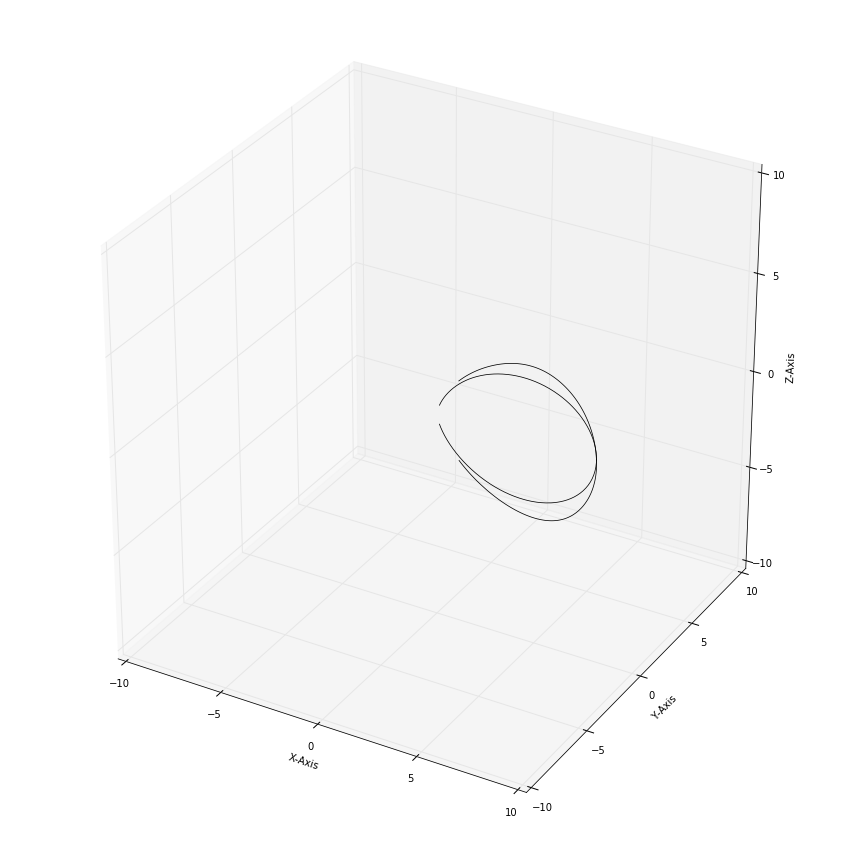

In [6]:
plot = flplt.FieldLinePlot()
plot.addFieldLine(fl1)
plot.addFieldLine(fl2)

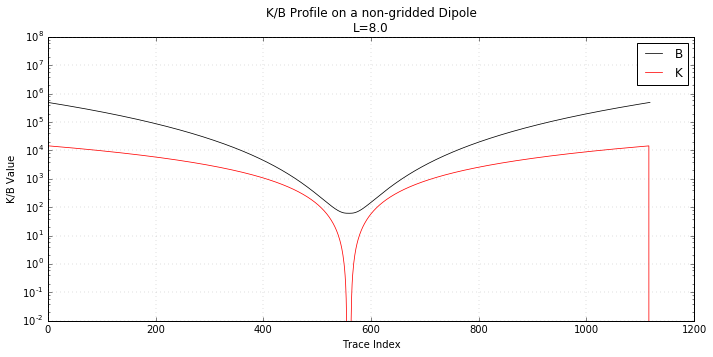

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_yscale('log')

y = fl1.m_trace_b_mirror
# x = fl1.m_trace_re
x = np.arange(len(y))
k = fl1.K

ax.plot(x,y, 'k-', lw=0.75, label="B")
ax.plot(x,k, 'r-', lw=0.75, label='K')
ax.axes.set_ylim([1e-2, 1e8])

ax.set_ylabel("K/B Value")
ax.set_xlabel("Trace Index")

plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.set_title("K/B Profile on a non-gridded Dipole\nL=8.0")
plt.legend()
fig.tight_layout()
# fig.savefig("/Volumes/8TB Seagate/PhD Data/profiles/dipoleKB.pdf")

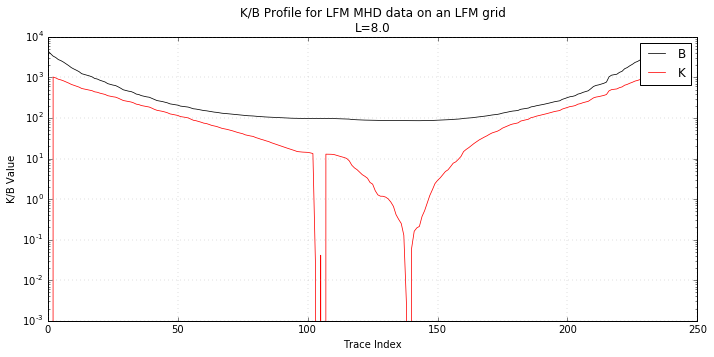

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_yscale('log')

y = fl2.m_trace_b_mirror
# x = fl1.m_trace_re
x = np.arange(len(y))
k = fl2.K

ax.plot(x,y, 'k-', lw=0.75, label="B")
ax.plot(x,k, 'r-', lw=0.75, label='K')

ax.set_ylabel("K/B Value")
ax.set_xlabel("Trace Index")

plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.set_title("K/B Profile for LFM MHD data on an LFM grid\nL=8.0")
plt.legend()
fig.tight_layout()
# fig.savefig("/Volumes/8TB Seagate/PhD Data/profiles/lfmKB.pdf")

559
[482 635]


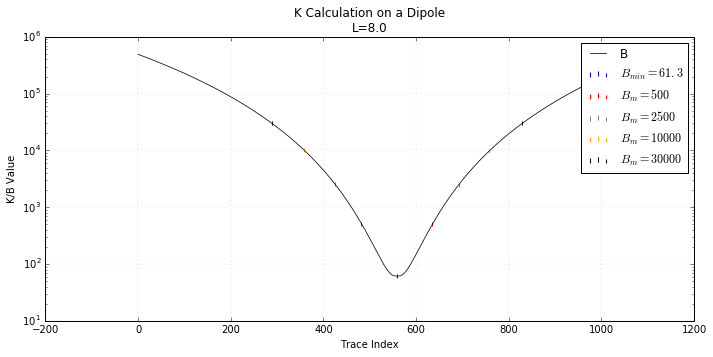

In [11]:
locBmin = np.argmin(fl1.m_trace_b_mirror)
print (locBmin)
bmin = fl1.m_trace_b_mirror[locBmin]

blist500 = fl1.get_b_loc(b=500)
print(blist500)

blist1000 = fl1.get_b_loc(b=2500)

blist10000 = fl1.get_b_loc(b=10000)
blist25000 = fl1.get_b_loc(b=30000)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_yscale('log')

y = fl1.m_trace_b_mirror
# x = fl1.m_trace_re
x = np.arange(len(y))
k = fl1.K

ax.plot(x,y, 'k-', lw=0.75, label="B")
# ax.plot(x,k, 'r-', lw=0.75, label='K')

ax.set_ylabel("K/B Value")
ax.set_xlabel("Trace Index")

ax.scatter(locBmin, y[locBmin], marker="|", color="b", label="$B_{{min}} = {:.1f}$".format(bmin))
ax.scatter(blist500, y[blist500], marker="|", color="r", label="$B_m=500$")
ax.scatter(blist1000, y[blist1000], marker="|", color="gray", label="$B_m=2500$")
ax.scatter(blist10000, y[blist10000], marker="|", color="orange", label="$B_m=10000$")
ax.scatter(blist25000, y[blist25000], marker="|", color="k", label="$B_m=30000$")

plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.set_title("K Calculation on a Dipole\nL=8.0")
plt.legend()
fig.tight_layout()
# fig.savefig("/Volumes/8TB Seagate/PhD Data/profiles/Kcalc.pdf")

139
[ 28 208]


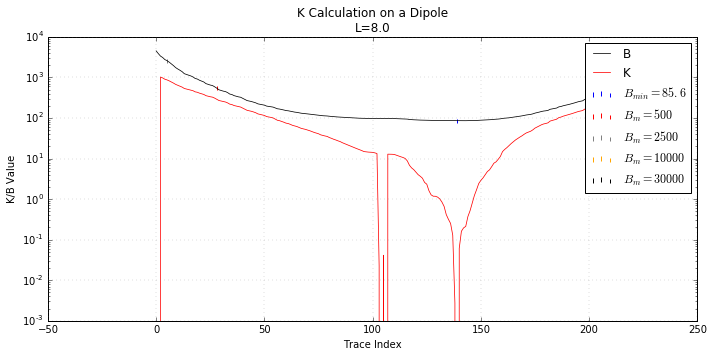

In [13]:
locBmin = np.argmin(fl2.m_trace_b_mirror)
print (locBmin)
bmin = fl2.m_trace_b_mirror[locBmin]

blist500 = fl2.get_b_loc(b=500)
print(blist500)

blist1000 = fl2.get_b_loc(b=2500)

blist10000 = fl2.get_b_loc(b=10000)
blist25000 = fl2.get_b_loc(b=30000)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_yscale('log')

y = fl2.m_trace_b_mirror
# x = fl1.m_trace_re
x = np.arange(len(y))
k = fl2.K

ax.plot(x,y, 'k-', lw=0.75, label="B")
ax.plot(x,k, 'r-', lw=0.75, label='K')

ax.set_ylabel("K/B Value")
ax.set_xlabel("Trace Index")

ax.scatter(locBmin, y[locBmin], marker="|", color="b", label="$B_{{min}} = {:.1f}$".format(bmin))
ax.scatter(blist500, y[blist500], marker="|", color="r", label="$B_m=500$")
ax.scatter(blist1000, y[blist1000], marker="|", color="gray", label="$B_m=2500$")
ax.scatter(blist10000, y[blist10000], marker="|", color="orange", label="$B_m=10000$")
ax.scatter(blist25000, y[blist25000], marker="|", color="k", label="$B_m=30000$")

plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.set_title("K Calculation on a Dipole\nL=8.0")
plt.legend()
fig.tight_layout()
# fig.savefig("/Volumes/8TB Seagate/PhD Data/profiles/Kcalc.pdf")

In [14]:
ls1 = ls.LShell(data=datal, start_loc=[-13.1, 0.0, 0.0], save_lines=True)
ls1.converge_p2(depth=1)




VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV
Calculating L*, K for point [-13.1, 0.0, 0.0]
B_mirror = 15.6804105892
K = 5.57873818033
Start Phi: 3.14159265359
Dipole L: 11.3680076604
0.825204557577
Out on EPS convergence
Low: None
High: None
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
Line Failed to Add in 4 line convergence
Failure Mode: -999
Phi: 0.0
Est. L: 11.3680076604
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


False

We have 1 retained lines.


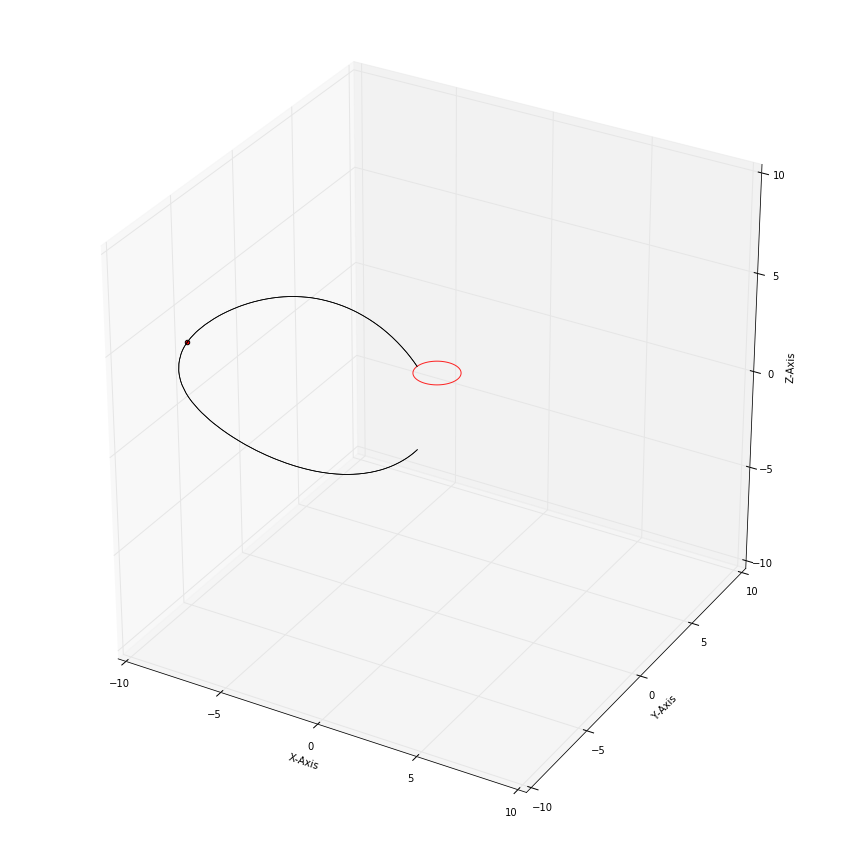

In [15]:
plot = flplt.FieldLinePlot()
plot.plot_drift_boundary(ls1)
plot.plot_shell_field_lines(ls1)

# plot.savePDF("/Volumes/8TB Seagate/PhD Data/profiles/distort.pdf")